In [8]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np

In [30]:
# 讀入mat數據
data = loadmat('data.mat') 

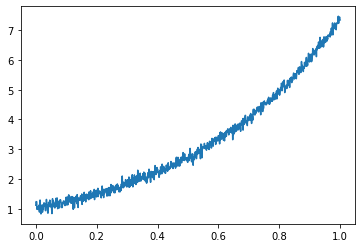

In [10]:
# 將x和y的資料繪製出來
x, y = data['x'],data['y']
plt.plot(x,y)
plt.show()

1. Compute the least square line $y=\theta_0+x\theta_1$

In [11]:
# 設定初始化參數
a = 1
b = 0
n = len(data['x'])
learning_rate = 0.3
epochs = 1000

a, b = 5.98091716963753 0.20702719954941007
Loss =  0.20580596682517396


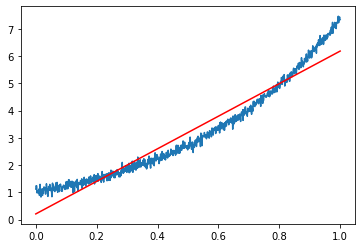

In [39]:
# 開始訓練回歸模型
for i in range(epochs):
    y_predicted = a*x + b
    
    # 計算微分值
    d_a = (-2/n) * sum(x * (y - y_predicted)) 
    d_b = (-2/n) * sum(y - y_predicted)       
    
    # 更新參數
    a = a-learning_rate*d_a
    b = b-learning_rate*d_b

# 印出更新後的結果
print('a, b =',a[0],b[0])  #a=5.98 b=0.2

y_predicted = a*x + b 
print('Loss = ',np.mean(pow(y_predicted-y,2)))

# 繪製預測的線與資料點
plt.plot(x,y)
plt.plot(x,y_predicted,'r-')
plt.show()

a, b =  5.980917169637538 0.20702719954940632
Loss =  0.205805966825174


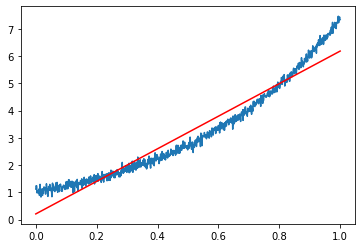

In [40]:
# 使用矩陣運算來做
x, y = data['x'],data['y']
plt.plot(x,y)
y_predict = np.array(y)
A = np.concatenate((np.ones((1001,1)),np.array(x)),axis=1)

b, a = (np.dot(np.dot(np.linalg.inv(np.dot(A.T,A)),A.T),y_predict)).tolist()

y_predicted= b[0] + a[0]*x 
print('a, b = ', a[0],b[0])
print('Loss = ',np.mean(pow(y_predicted-y,2)))
plt.plot(x,y_predicted,'r-')
plt.show()

2. using second order polynomial $y=\theta_0+x\theta_1+x^2\theta_2$ to fit our data

a, b, c = 5.746239695873643 0.2380015284105624 1.1620685451366861
Loss =  0.015792146372415744


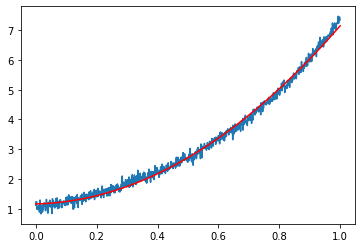

In [43]:
x, y = data['x'],data['y']
plt.plot(x,y)
a = 1
b = 0
c = 0
n = len(data['x'])
learning_rate = 0.3
epochs = 2000

for i in range(epochs):
    y_predicted = a*x*x + b*x + c
    d_b = (-2/n) * sum(x * (y - y_predicted)) # Derivative
    d_c = (-2/n) * sum(y - y_predicted) # Derivative
    d_a = (-2/n) * sum(x *x *(y - y_predicted)) # Derivative

    a = a-learning_rate*d_a
    b = b-learning_rate*d_b
    c = c-learning_rate*d_c
print('a, b, c =',a[0],b[0],c[0]) #a=5.98 b=0.2

y_predicted = a*x*x + b*x + c 
print('Loss = ',np.mean(pow(y_predicted-y,2)))
plt.plot(x,y_predicted,'r-')
plt.show()

a, b, c =  5.8373500791812996 0.14356709045618316 1.1789459877331088
Loss =  0.015744919931207565


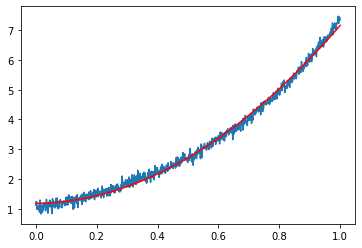

In [38]:
x, y = data['x'],data['y']
plt.plot(x,y)
y_predict = np.array(y)
A = np.concatenate((np.ones((1001,1)),np.array(x),np.array(pow(x,2))),axis=1)

c, b, a = (np.dot(np.dot(np.linalg.inv(np.dot(A.T,A)),A.T),y_predict)).tolist()

y_predicted= c[0] + b[0]*x + a[0]*x*x
print('a, b, c = ',a[0], b[0], c[0])
print('Loss = ',np.mean(pow(y_predicted-y,2)))
plt.plot(x,y_predicted,'r-')
plt.show()

using the following loss function:

![lossfunc](./img/lossfunc.png)

In [41]:
# 因為有絕對值，所以我們需要考慮正負
def sign(k):
    sign_k = []
    for i in range(len(k.T[0])):
        if k[i] > 0:
            sign_k.append(1)
        elif k[i] == 0:
            sign_k.append(0)
        else:
            sign_k.append(-1)
    
    sign_k_np = np.array(sign_k).reshape(len(sign_k), -1)
    return sign_k_np

1001.0
theta2:  [3.13008815]
theta1:  [2.70941499]
thata0:  [0.76443556]


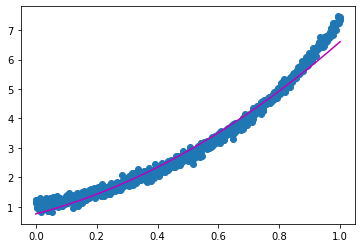

In [42]:
theta2 = 0
theta1 = 0
theta0 = 0

L = 0.1  # 學習率
epochs = 200  # 全部會跑的iteration數

n = float(len(x)) # 計算X的數量
print(n)

# 使用 Gradient Descent 來更新模型 
for i in range(epochs): 
    y_pred = theta2*x*x + theta1*x + theta0  # The current predicted value of Y
    si = sign(y - y_pred)
    D_theta2 = (-1/n) * sum(x * x * si)  # 使用 theta2 對 Loss function 微分
    D_theta1 = (-1/n) * sum(x * si)      # 使用 theta1 對 Loss function 微分
    D_theta0 = (-1/n) * sum(si)          # 使用 theta0 對 Loss function 微分
    theta2 = theta2 - L * D_theta2       # 更新 theta2
    theta1 = theta1 - L * D_theta1       # 更新 theta1
    theta0 = theta0 - L * D_theta0       # 更新 theta0

print('theta2: ', theta2)
print('theta1: ', theta1)
print('thata0: ', theta0) 

# 最終的回歸曲線
y_pred = theta2*x*x + theta1*x + theta0

# 繪圖
plt.scatter(x,y) 
plt.plot(x,y_pred, color='m')
plt.show()